# Summary Notebook
this notebook is about the summary of weekly progress and three questions.

## Week 1
1. Use API to download data from Domain, and scrape rental data.
   - Organize the price, state, propertyType, bathrooms, bedrooms, carspaces, region, suburb, postcode, dateListed, listingSlug, latitude, longitude in the rental data of the domain into csv. 
2. Find External datasets (school location, population, yearly income, train station, shopping malls).
3. Geographic visualization (postcode, SA2, suburb)
   - Download the postcode info by p1_postcode_info_downloader.py.


## Week 2
1. Derive population forecast (SA2).
   - Using the data of population number to forecast the population in the future 3 years. 
   - Use the population of each region to divide the area of each region to calculate the population density of each region, and convert the data range into a postcode range.
2. Affluence analysis (SA2)
   - Use annual income data to predict annual income for the next three years, and use annual income to calculate weekly income.
   - Yearly income can help to analyze weekly income excluded part-time jobs.
3. Continuous download rental data.
   - As the required features are missing from the pervious data.

## Week 3

1. Use Openrouteservice to calculate the duration and distance between the facilities/CBD and house.
   - Use the Openrouteservice coding provided.
2. Find the past rental data.

## Week 4: Relate to  question 1
Question 1: What are the most important internal and external features in predicting rental prices? 
1. Analyse internal features.
   - Analysis of the influence of the number of bedrooms, bathrooms, carspaces and property types on rent.
   -  Different house configurations affect the rent.
2. Analyse external features.
   - To find the correlation between distance and duration of facilities, population density and weekly income with rental price.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

### Internal features

To explore the relationship between the features of the data itself, we first draw a Pearson correlation.

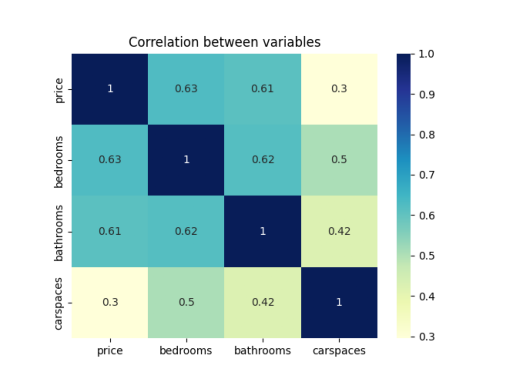

In [27]:
internal_corrleation = mpimg.imread("../plots/interal_correlation.png")
plt.imshow(internal_corrleation)
plt.axis('off')
plt.show()

According to the image, we can see that its bedrooms, bathrooms, and carspaces will affect Price, so let's take a look at their distribution first.

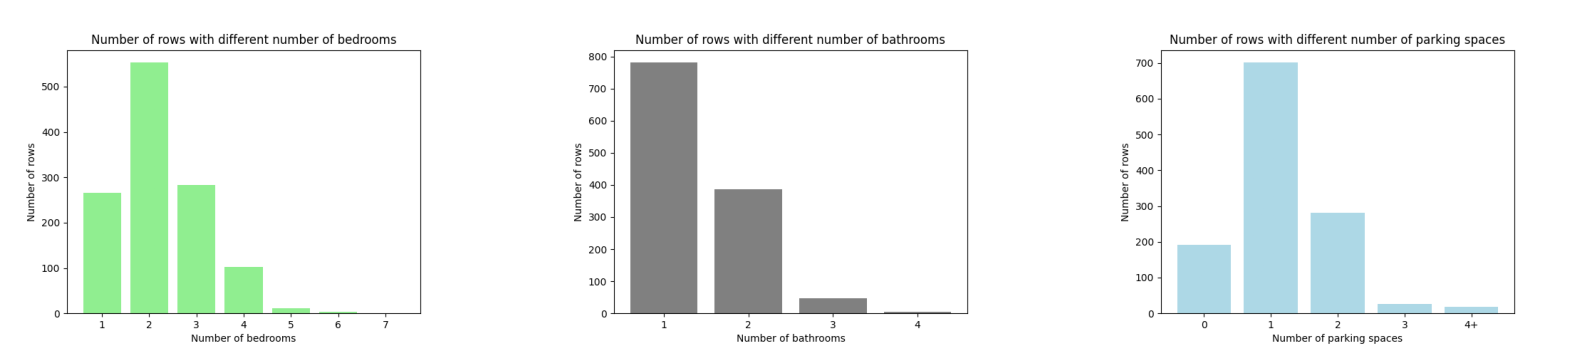

In [28]:
dist1 = mpimg.imread("../plots/internal_distribution/distribution1.png")
dist2 = mpimg.imread("../plots/internal_distribution/distribution2.png")
dist3 = mpimg.imread("../plots/internal_distribution/distribution3.png")

plt.figure(figsize=(20, 10))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow([dist1, dist2, dist3][i])
    plt.axis('off')
plt.savefig("../plots/internal_distribution.png")
plt.show()

Since we had removed the outliers during the preprocessing, most of the remaining bedrooms are bedrooms less than 5. Bathrooms and Carspaces did the same. As can be seen overall, two bedrooms, one bathroom, and one carspace are the most.

Now let's look at what different numbers do to Rent.

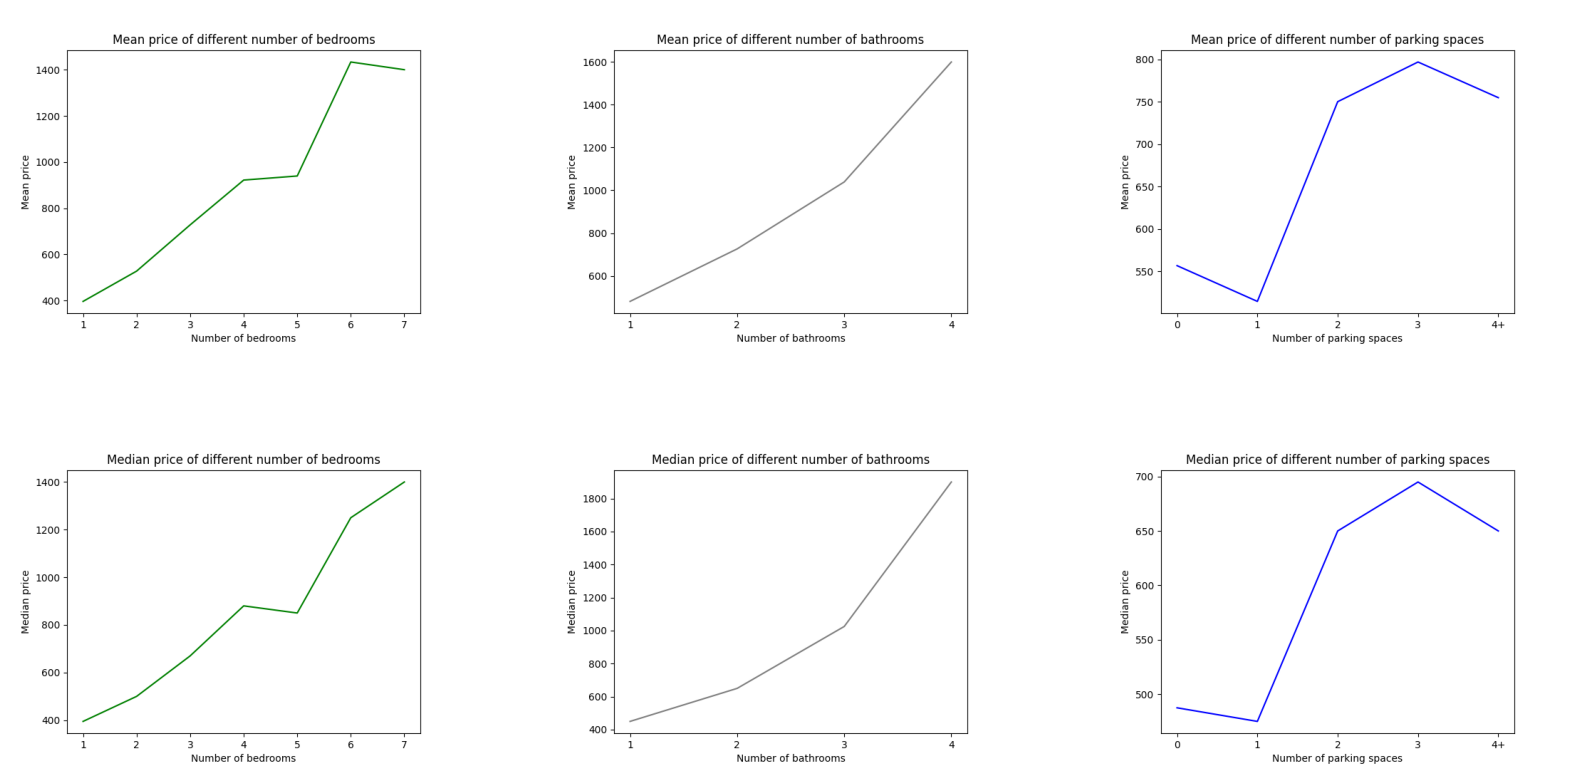

In [29]:
mean1 = mpimg.imread("../plots/mean_price/mean_price1.png")
mean2 = mpimg.imread("../plots/mean_price/mean_price2.png")
mean3 = mpimg.imread("../plots/mean_price/mean_price3.png")
median1 = mpimg.imread("../plots/median_price/median_price1.png")
median2 = mpimg.imread("../plots/median_price/median_price2.png")
median3 = mpimg.imread("../plots/median_price/median_price3.png")

plt.figure(figsize=(20, 10))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow([mean1, mean2, mean3, median1, median2, median3][i])
    plt.axis('off')
plt.savefig("../plots/mean_median.png")
plt.show()

When the number of bedrooms and bathrooms are going up, it is going up. The overall trend in carspaces is less pronounced, fluctuating but up.

Every time they go up, the growth rate of rent changes.

### what is growth rate?

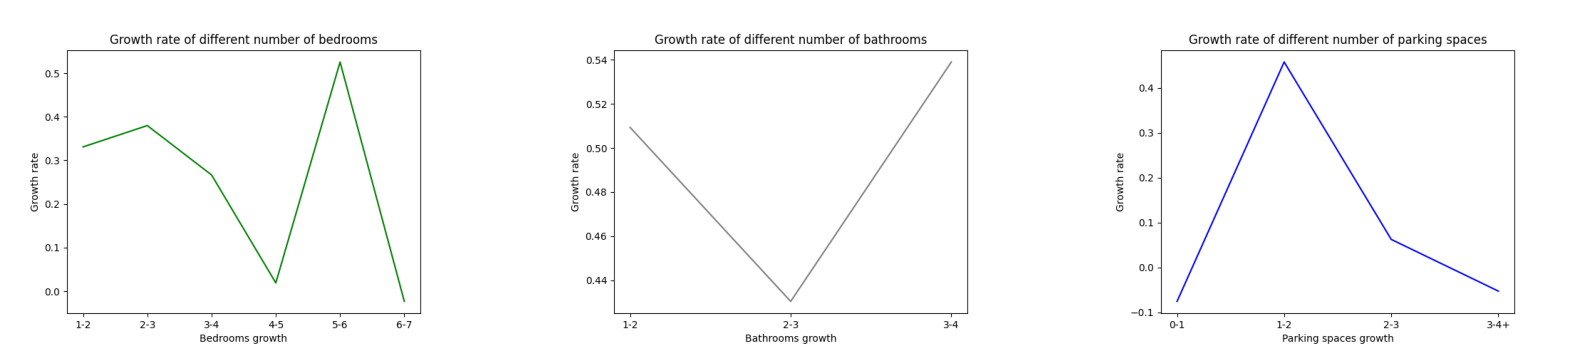

In [30]:
growth1 = mpimg.imread("../plots/growth_rate/growth_rate1.png")
growth2 = mpimg.imread("../plots/growth_rate/growth_rate2.png")
growth3 = mpimg.imread("../plots/growth_rate/growth_rate3.png")

plt.figure(figsize=(20, 10))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow([growth1, growth2, growth3][i])
    plt.axis('off')
plt.savefig("../plots/growth_rate.png")
plt.show()

The change in growth rate fluctuates greatly. We saw the bathrooms go from 2 to 3, and the growth rate was not that high. And when carspaces are enough, more parking areas won't make rent go up.

In addition to these three features, another feature can be considered: Property Type.

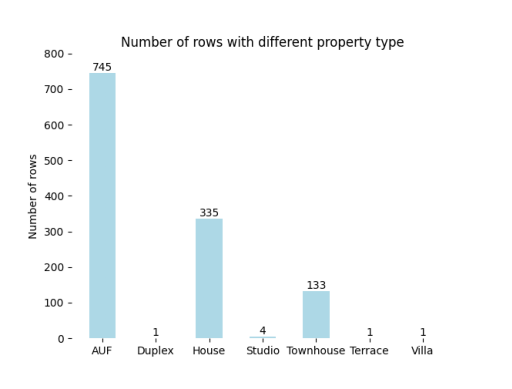

In [31]:
dist4 = mpimg.imread("../plots/internal_distribution/distribution4.png")

plt.imshow(dist4)
plt.axis('off')
plt.show()

This plot is only relating to sample! Normally, there would be a lot of studios but there are not many in this data.

As you can see, the main three are AUF (ApartmentUnitFlat), House and Townhouse. Their mean prices are 488, 741 and 739, respectively.

After discussing the distribution and influence of a feature itself, we want to explore their relationship.

First of all, different features will show different mean prices under different property types.

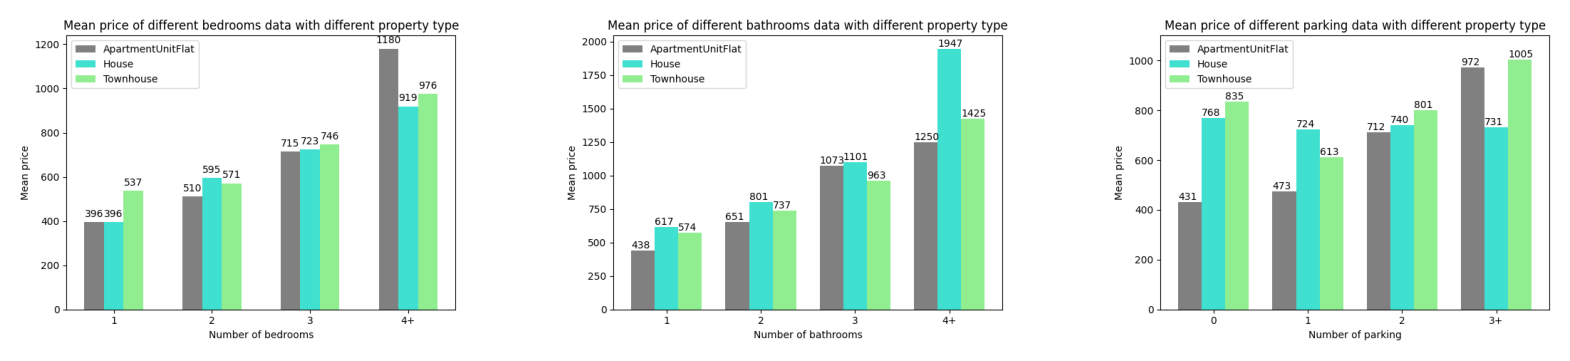

In [32]:
mean11 = mpimg.imread("../plots/internal_relationship/mean1.png")
mean12 = mpimg.imread("../plots/internal_relationship/mean2.png")
mean13 = mpimg.imread("../plots/internal_relationship/mean3.png")

plt.figure(figsize=(20, 10))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow([mean11, mean12, mean13][i])
    plt.axis('off')
plt.savefig("../plots/internal_relationship/mean.png")
plt.show()

In addition, we also explore the impact of different house configurations on rent. 

For example, one bedoom with one bathroom, two bedoom with one bathroom and two bedoom with two bathrooms.

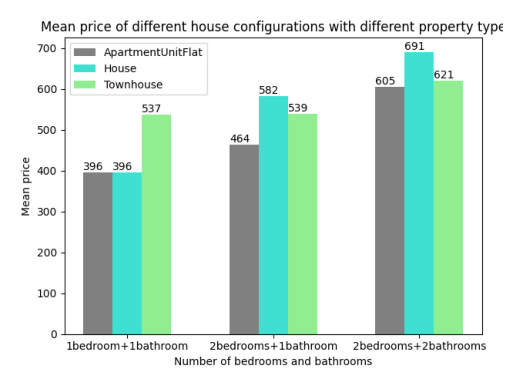

In [33]:
bed_bath = mpimg.imread("../plots/internal_relationship/1b1b_2b1b_2b2b_with_different_property_type.png")
plt.imshow(bed_bath)
plt.axis('off')
plt.show()

As can be seen from the figure, the configuration of the house has no great influence on the price of the townhouse. And the other two go up in price.

Another point I can find out is from the bathrooms if the number of bedrooms is greater than or equal to rent.

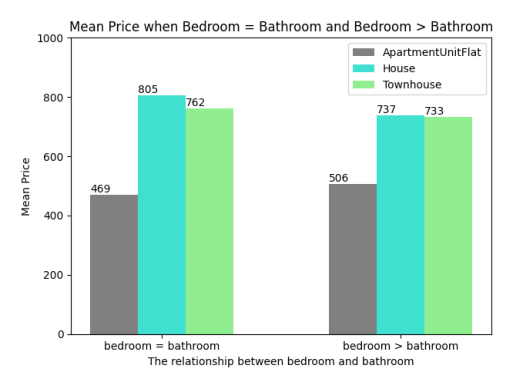

In [34]:
relationship_bed_bath = mpimg.imread("../plots/internal_relationship/both_of_bedrooms_and_bathrooms_affect_rent.png")
plt.imshow(relationship_bed_bath)
plt.axis('off')
plt.show()

There was some improvement for house, but not much improvement for the other two types of houses.

### External features

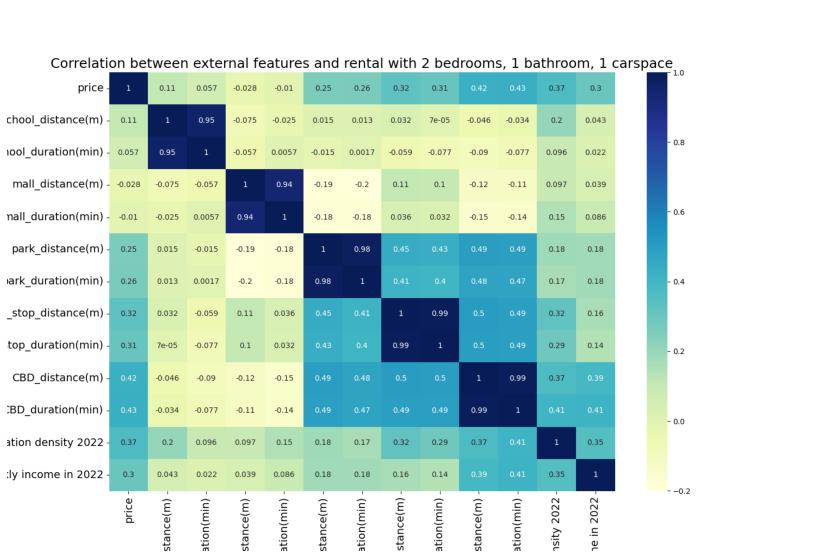

In [7]:
plt.figure(figsize=(15,10))
external_corrleation_2bedrooms = mpimg.imread("../plots/external_correlation.png")
plt.imshow(external_corrleation_2bedrooms)
plt.axis('off')
plt.show()

Distance and duration to parks, train stations and CBD, as well as population density and weekly income were more important among all external factors based on the most common type in the dataset.

The closer the rental location is to the park, train station, and CBD, the higher the rent will be. And the higher the area's population density and weekly income, the higher the rent will be.

## Week 5: Relate to question 2
Question 2:  What are the top 10 suburbs with the highest predicted growth rate?
1. Forecast the future 3-year rent price.
   - After features selection, we choose weekly income and population density as the model features, because the location of facilities including park and train station will not change significantly over time in the next three years.
   - Linear regression model VS Random Forest model
2. Get the top-10 suburbs with the highest growth rate.
3. Limitations and suggestions.

#### Past rent dataset from 'https://www.dffh.vic.gov.au/publications/rental-report', which contain the median rent in every suburb for each quarter from 2000 to 2022.

### Creat dataframe

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import pandas as pd
import numpy as np

In [37]:
dataset = pd.read_csv('../data/curated/dataset_for_model.csv', index_col = 0)
dataset.head()

,rent,income,population
0,472.50,1249.52,3317.0
1,472.50,1249.52,3317.0
2,393.75,1194.02,4267.0
3,515.00,1032.40,3867.0
4,351.75,762.65,9913.0


## Modelling

#### As we are aiming to do the prediction, we choose linear regression and random forest to fit the model.

In [38]:
X = dataset.iloc[:, 1:3].values
y = dataset.iloc[:, 0].values
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=1)

### Linear Regression

In [39]:
#First we choose linear regression to fit the model
linreg = LinearRegression()
model=linreg.fit(X_train, y_train)
y_pred_lr = model.predict(X_test)
#evaluate the linear regression
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_lr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_lr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)))


Mean Absolute Error: 41.91224170109746
Mean Squared Error: 2905.013897403911
Root Mean Squared Error: 53.89818083575651


#### Random Forest 

In [40]:
# random forest regression
regressor = RandomForestRegressor(n_estimators=40, bootstrap = True, max_depth = 20, min_samples_leaf = 1, min_samples_split = 10, random_state=60)
regressor.fit(X_train, y_train)
y_pred_rf = regressor.predict(X_test)
random_forest_error=y_pred_rf-y_test
# evaluate random forest
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rf))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rf))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))

Mean Absolute Error: 32.78373503687157
Mean Squared Error: 1939.2258904197674
Root Mean Squared Error: 44.0366425879604


#### According to the evaluation for linear forest and linear regression above, Random forest have a lower RMSE. Therefore, Random forest performs better here.

### Rate

In [41]:
rate = pd.read_csv('../data/curated/top10_suburb.csv', index_col = 0)
rate

,postcode,2025_pre,2025_22_rate,suburb
152,3300,490.420210,0.582001,Hamilton
5,3052,440.549392,0.400793,Parkville
11,3184,579.671729,0.380171,Elwood
17,3181,553.678965,0.367109,Prahran
18,3181,553.678965,0.367109,Windsor
137,3357,498.962350,0.367020,Buninyong
156,3840,386.101054,0.354741,Morwell
109,3134,563.514800,0.341702,Ringwood
54,3194,584.959142,0.314515,Mentone
26,3124,596.418301,0.282620,Camberwell


### Limitation
 1. The selected models stil needs improvement.
 2. Future weekly income and population density are all prectied by the past dataset. 
 3. The past rental data is not complete.

### Suggestion
1. Try other models: for example Time series, which can predict future rent price by past rent price over time.
2. A more complete dataset could help to perform a more comprehensive analysis.

## Week 6: Relate to question 3
Question 3: What are the most liveable and affordable suburbs according to your chosen metrics?
1.  Analyze liveable areas:
   - Drawing a map with postcodes of Victoria state showing the distribution of facilities (school, mall, train station and park). 
   - Add a layer of thermography for the population.
2. Analyze affordable areas:
   - $affordable\ index = \frac{yearly\ income}{yearly\ rent}$
   - Add a layer of affordable index to the map.
3. Choose a most liveable and affordable suburb by our definitions and assumptions.



Liveable - an area that has a certain number of infrastructures (park, train stop, school, mall) and population. Also is near to the CBD.

Affordable - how many times yearly income is to yearly rent prices of a postcode in 2021. The more the times, the more affordable the area is.

In [4]:
# Sort by affordable index
rent_income = pd.read_csv('../data/curated/rent_income21.csv')
top_index = rent_income.sort_values(by='affordable index', ascending=False)

In [5]:
# find the top 10 area with affordable index
top_index.iloc[:10,:]

,Unnamed: 0,Postcode,Median Yearly rent price in 2021,Median income in 2021-2022,affordable index
80,80,3400,15080,60288.97,3.997942
79,79,3355,16640,58494.40,3.515288
3,3,3427,18200,61155.23,3.360177
4,4,3429,18200,61155.23,3.360177
93,93,3530,15496,51640.70,3.332518
94,94,3542,15496,51640.70,3.332518
103,103,3586,15496,51002.48,3.291332
100,100,3583,15496,51002.48,3.291332
101,101,3584,15496,51002.48,3.291332
102,102,3585,15496,51002.48,3.291332


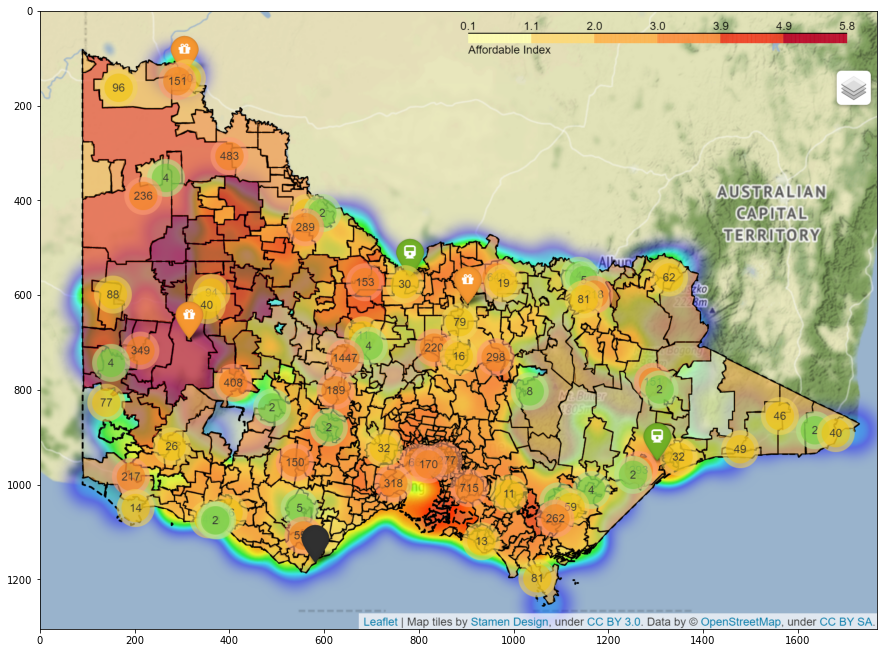

In [6]:
plt.figure(figsize=(15,12))
live_aff = mpimg.imread("../plots/liveable_affordable.png")
plt.imshow(live_aff)
plt.show()

From the plot above, we could found that the areas around CBD have more infrastructures than other areas. Also, from the population, these ares also contain most of the population in Victoria state.

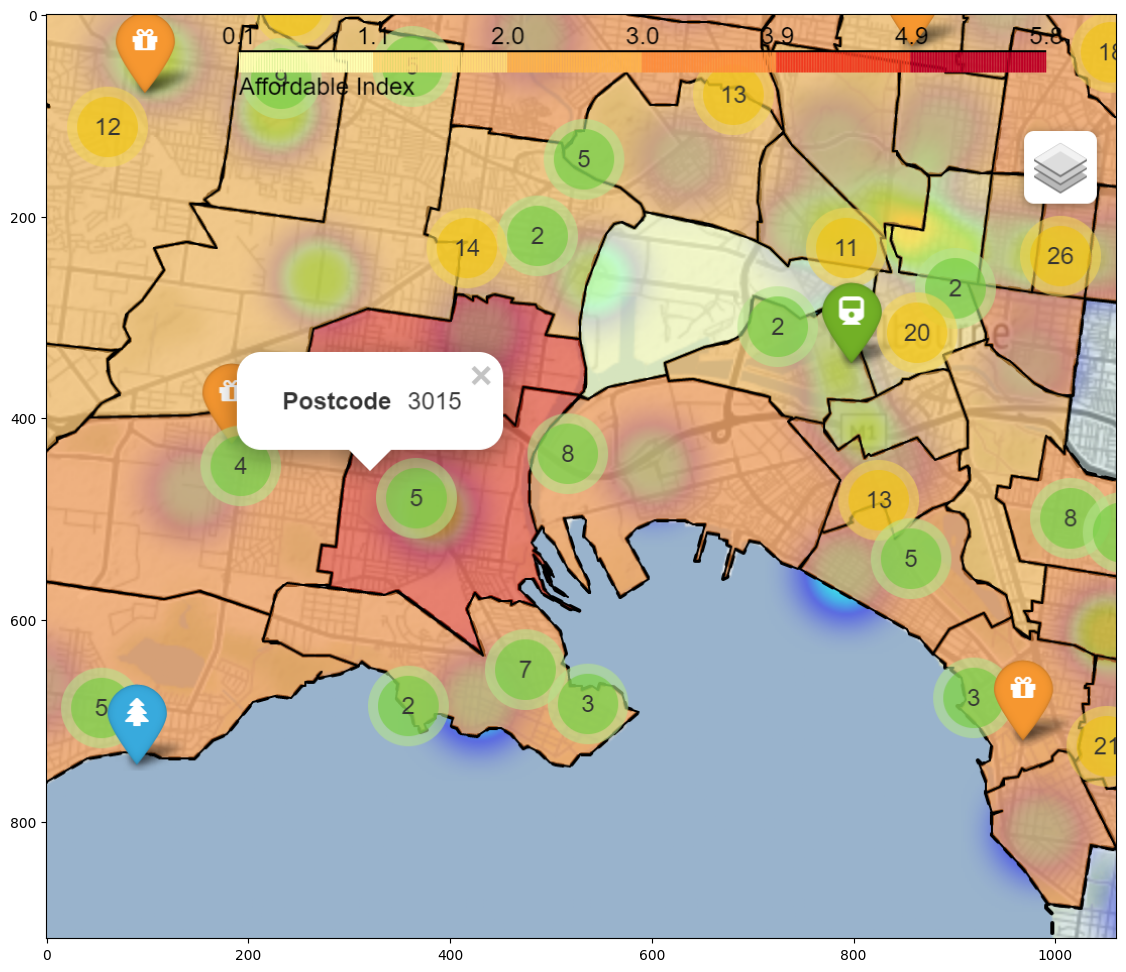

In [44]:
plt.figure(figsize=(15,12))
poa_3015 = mpimg.imread("../plots/postcode_3015.png")
plt.imshow(poa_3015)
plt.show()

As we zoomed in to the areas around CBD and combining with affordability, we could see that postcode 3015 has the highest affordability in these areas. Although this area only have schools, the areas around it has malls, parks and train station and it is really close to CBD. For affordability, the area in the west of Victoria state is quit high. However, the liveablility is not that good in those areas since there are much less infrastructures in that areas compared to the middile of Victoria.

Therefore, we will choose postcode 3015 as most liveable and affordable area in Victoria state.